In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [27]:
df = pd.DataFrame({
    'Karakter Warga': [5],
    'Lingkungan': [4],
    'Dukungan Komunitas': [5],
    'Keberdayaan Warga': [3],
    'Kewirausahaan': [5],
    'Inovasi': [7],

    'Sumber Daya': [8],
    'Teknologi': [4],
    'Rantai Nilai': [7],
    'Keberlanjutan': [5],
    'Institusi': [8],

    'Indeks Smart Community': [3],
})

## Metode 1

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [34]:
all_data = df.to_numpy().ravel()

# scaler = StandardScaler()
# all_data_scaled = scaler.fit_transform(all_data.reshape(-1, 1)).ravel()

# scaler = MinMaxScaler()
# all_data_scaled = scaler.fit_transform(all_data.reshape(-1, 1)).ravel()

# scaler = RobustScaler()
# all_data_scaled = scaler.fit_transform(all_data.reshape(-1, 1)).ravel()

all_data_scaled = all_data / np.max(all_data)

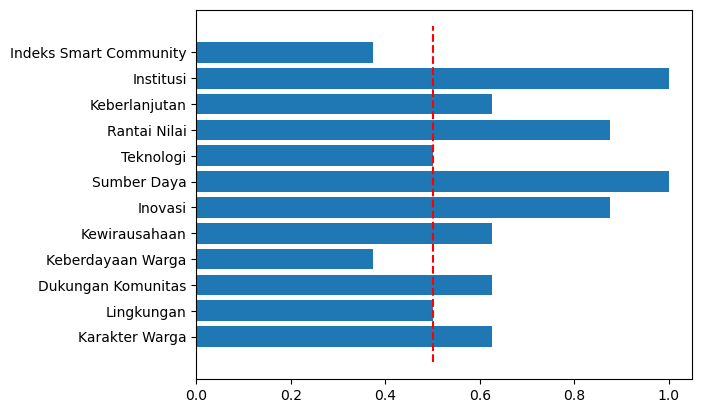

In [35]:
fig, ax = plt.subplots()

threshold = np.quantile(np.abs(all_data_scaled), [0.25])

ax.barh(df.columns, all_data_scaled)
ax.vlines(threshold, -1, 12, colors='r', linestyles='dashed')

## Metode 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from lime.lime_tabular import LimeTabularExplainer 

In [33]:
X = df.iloc[:, :].values
y = df.iloc[:, -1].values 

In [ ]:
classifier = DecisionTreeRegressor()
classifier.fit(X, y)

In [ ]:
predict_fn = lambda x: classifier.predict(x)
data_instance = X[0]

explainer = LimeTabularExplainer(X, feature_names=df.columns, mode='regression')
exp = explainer.explain_instance(data_instance, predict_fn, num_features=len(df.columns))

print(exp.as_list())